Classification starts from here :
K-Means++(upgraded version of K means)
1. First random centroid is chosen
2. On the basis of euclidean distance, distance of datapoints from centroid is calculated
3. then next centroid is formed among the remaining data points using weighted random selection weighted by d^2
4. upper two steps are repeated , till we get required no(k) of centroids
5. After that we go with standard k 
6. Now we, just adjust the positon of the centroid based on the centre of mass

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [3]:
data=pd.read_csv('./datasets/Mall_Customers.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Only  taking last two features in x as it will be difficult to visualise the clustering 
but we should take gender and age also

In [20]:
x=data.iloc[:,[3,4]].values  #aise karke third and fourth column ko lete hai
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Here no splitting of train and test as we r doing clustering only is is unsupervised algo, therefor no y also 

ELBOW METHOD    

In [21]:
from sklearn.cluster import KMeans
wcss=[]   #to calcualte and store the wcss
#it will be a hit and trial process, we will calculate the wcss and from the graph we will select the required no of clusters 
#where there will be kink in the graph
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)   #n_clusters means kitne clusters
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   #wcss mai intertia/wcss append kr diya

NOW GRAPH TO DETERMINE THE OPTIMAL NO OF CLUSTERS  

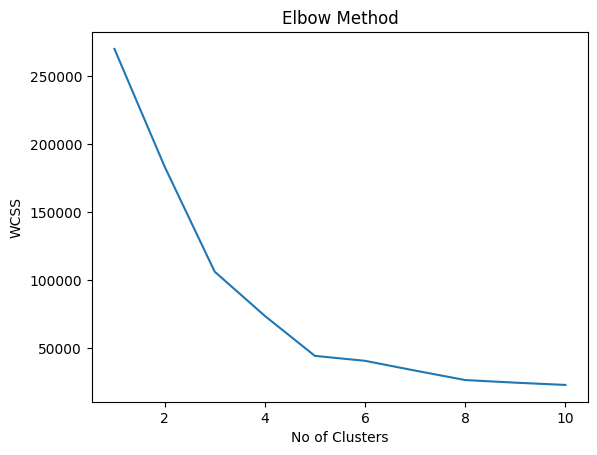

In [22]:
plt.plot(range(1,11),wcss)   #x-axis,y-axis
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

Therefore no of clusters will be 5

In [23]:
optimised_kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
optimised_kmeans.fit(x)
y_kmeans=optimised_kmeans.fit_predict(x)  #it returns every class of clusters
#fit predict trains and give the cluster value also
print(y_kmeans)  #from 0 to 4

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [24]:
print(type(y_kmeans))

<class 'numpy.ndarray'>


VISUALISING THE RESULTS

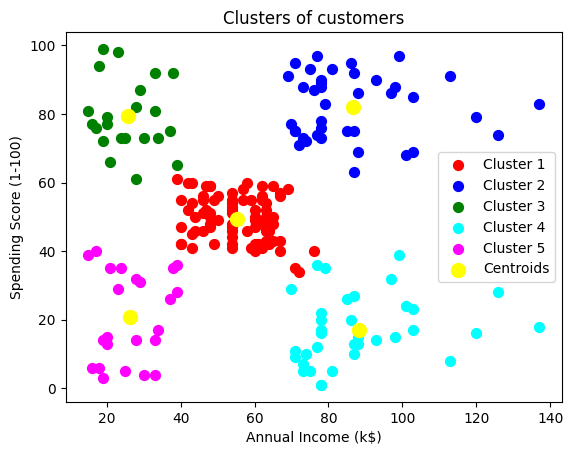

In [27]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

# Plot the centroids
centroids = optimised_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Important functions
1. centroids = optimised_kmeans.cluster_centers_
2. plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'yellow', label = 'Centroids')
2. plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')